<a href="https://colab.research.google.com/github/vishwaraghava009/Titanic-Survivors/blob/main/Titanic_Survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Logistic Regression to predict Titanic Survivors

The workflow is as follows:



1.   Analyze the
data by plotting Histograms.
2. Binary Variables.
3. Correaltion Matrix.
4. Training and
Test Set.
5. Logiistic Regression.
6. Accuracy
Assessment.

Before going through the workflow let's import the required libraries and data

## Libraries, directory and data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course-20230613T154859Z-001/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course-20230613T154859Z-001/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [3]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
#load the data
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 1. Data Analysis by plotting Histograms

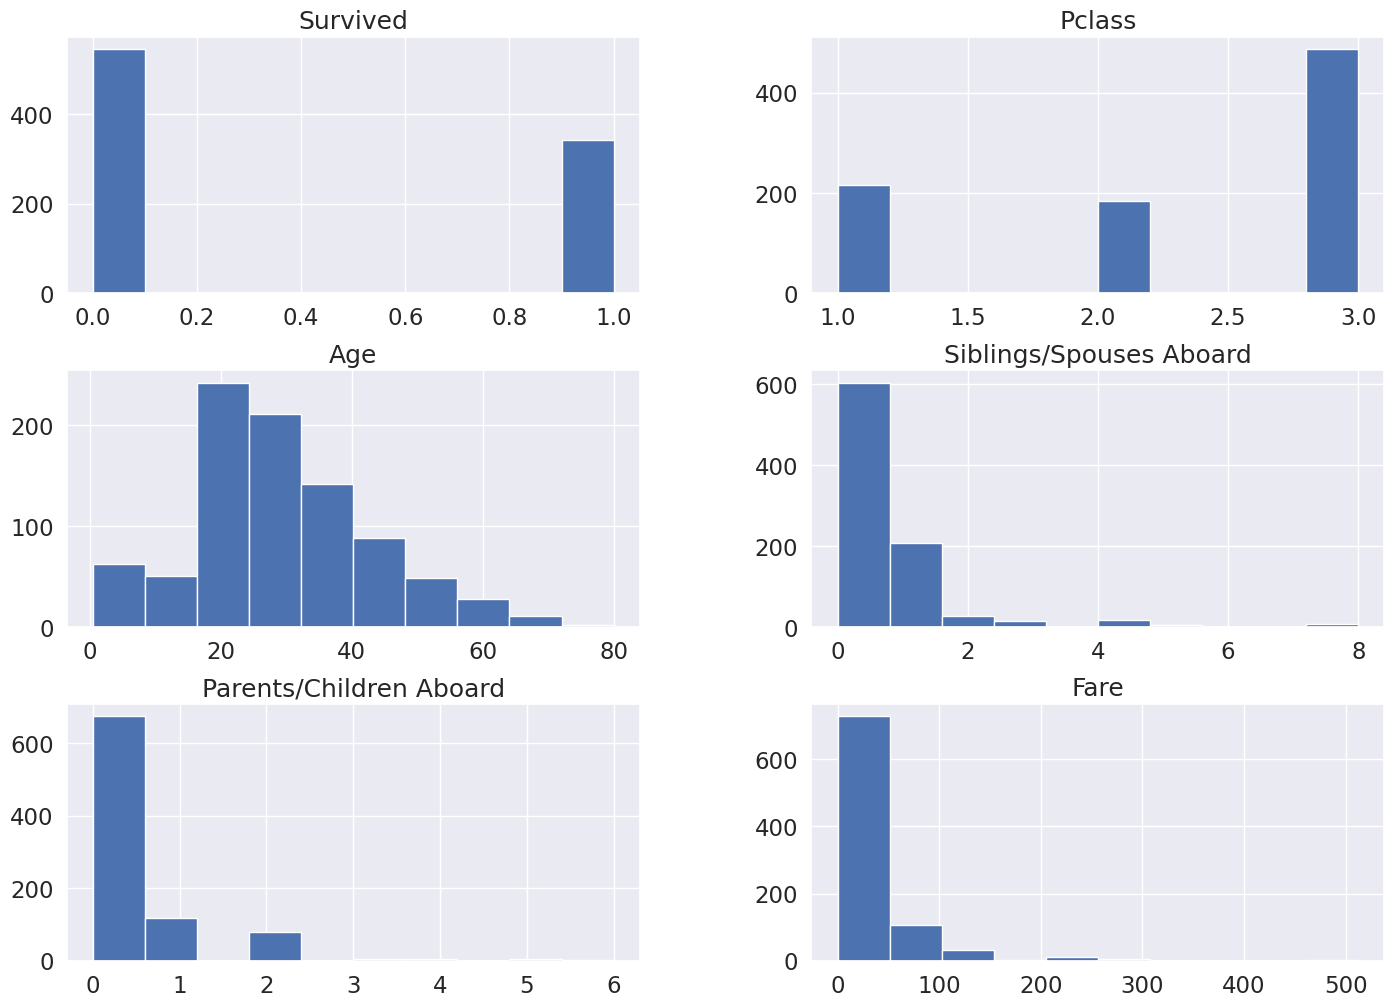

In [18]:
#Histograms
df.hist(figsize= (17, 12));

Let's drop the `Name` variable because it has no importance in our predictions.

In [19]:
#Drop name variable
df = df.drop(columns = "Name")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Performing the summary statistics
command enables to get to know
better the variables through statistics
like the mean, median, and standard
deviation.

In [20]:
#Summary statistics
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


We could see the diiference in the max and 75% values of the variables, `Age`, `Siblings/Spouses Aboard`, `Parents/Children Aboard` and `Fare`. So, there are a few outliers.

## 2. Binary Variables

Now, let's use the `get_dummies()` function to turn our character variables, namely sex, into numbers and drop the dummy variables too.

In [26]:
#Transform character variables
df = pd.get_dummies(data = df, drop_first=True)

In [27]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


## 3. Correlation Matrix

The Correlation Matrix allows you
to pick variables for your model.
Remember that if the correlation is
close to 1 or -1, you may have a
multicollinearity issue


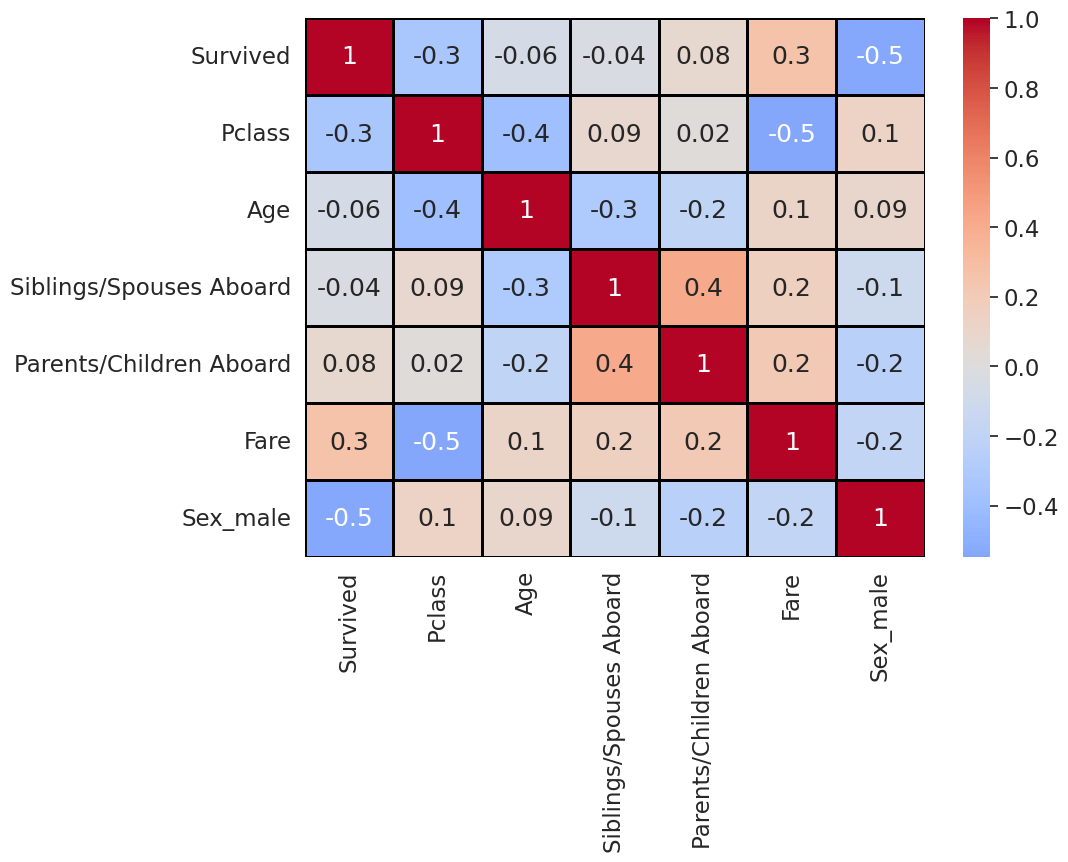

In [28]:
#Correlation matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black');

From the correlation matrix we could see a little to no strong correlation between any of the variables.

Now, let's assign the values fro X and y.

In [29]:
#Prepare X and Y
y = df.Survived
X = df.drop(columns = "Survived")
X = sm.add_constant(X)

## 4. Training and Test Set

Create a training and test set with an
80/20 split. This allows an unbiased
assessment of the model.

In [30]:
#Training and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 63)

In [31]:
X_train.head()

,const,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
796,1.0,2,34.0,0,0,13.0000,1
289,1.0,1,19.0,1,0,91.0792,0
90,1.0,3,20.0,0,0,7.8542,1
507,1.0,3,29.0,0,0,7.7500,1
371,1.0,1,22.0,0,0,135.6333,1


## 5. Logistic Regression

let's fit the Logitic regression model to our data.

In [32]:
#Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.436225
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.3498
Time:                        07:18:22   Log-Likelihood:                -309.28
converged:                       True   LL-Null:                       -475.67
Covariance Type:            nonrobust   LLR p-value:                 7.705e-69
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.8679      0.640      9.169      0.000       4.614   

Positive coefficients of the varibales increases the Likelihood of Survival while the negative coefficients decreases the likelihood of survival.

Variable 'Fare' can be observed to be statistically insignificant.

Let's create functuon which takes in the coefficient values and returns the probability of change in Likelihood of survival.

In [35]:
def logistic_reader(coefficient):
  """
  takes the coefficient value as input and gives us the probability of cahnge in likelihood of survival
  """
  probability = round((np.exp(coefficient) - 1) * 100, 2)
  if probability > 0:
    print("The likelihood increases by", probability, "%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood decreases by", probability, "%")

In [38]:
logistic_reader(-1.3122), logistic_reader(-0.3640)

The likelihood decreases by -73.08 %
The likelihood decreases by -30.51 %


(None, None)

## Model and Accuracy Assessment

But, first, let's make predictions using the multilinear regression model.

In [39]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([0, 0, 0, 1, 1])

From Scikit-Learn we can import classification report to have a report on accuracy, precision, recall and f1 scores.

In [40]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       116
           1       0.68      0.79      0.73        62

    accuracy                           0.80       178
   macro avg       0.78      0.80      0.78       178
weighted avg       0.81      0.80      0.80       178



Based on the classification report:

1. Precision: Precision measures the proportion of correctly predicted positive instances out of the total predicted positive instances. In your case, the precision for class 0 is 0.88, indicating that 88% of the instances predicted as class 0 are indeed correct. For class 1, the precision is 0.68, meaning that 68% of the instances predicted as class 1 are correct.

2. Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted positive instances out of the total actual positive instances. A recall of 0.80 for class 0 suggests that 80% of the actual instances of class 0 were correctly identified by the model. For class 1, the recall is 0.79, indicating that 79% of the actual instances of class 1 were correctly predicted.

3. F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance. An F1-score of 0.84 for class 0 indicates a good trade-off between precision and recall, whereas an F1-score of 0.73 for class 1 suggests that the model's performance for this class is slightly lower.

4. Support: Support represents the number of instances in each class present in the dataset. In this case, there are 116 instances of class 0 and 62 instances of class 1.

5. Accuracy: The overall accuracy of your model is 0.80, meaning that it correctly predicts the class labels for 80% of the instances.

6. Macro Avg and Weighted Avg: These metrics provide an average performance measure across all classes, giving equal importance to each class (macro avg) or considering the class imbalance (weighted avg). In your case, both macro avg and weighted avg F1-scores are around 0.78, indicating reasonable overall model performance.